# IST - DBM2: DATA MINING
*ANA ISABEL LOPEZ AND DAVID PARDO*

In [1]:
import pandas as pd
import pytz
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Some preprocessing
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
import seaborn as sns 

**PREPROCESSING AND CLUSTERING**

To carry out our project, we have chosen a database that contains various parameters related to meteorology at specific hours of each day for the five largest cities in Spain. The data were collected from the year 2015 to the year 2018. 
Because of the store of data hourly over 3 years, the amount of it becomes enormous, with 178.396 rows of data. Therefore, in this case, it is important for our project to perform a thorough preprocessing exercise to clean and reduce the amount of data used.

In [2]:
# Lecture of the file and convert to dataframe
weather = pd.read_csv('weather_features.csv',header='infer')
df = pd.DataFrame(weather)
df.shape

(178396, 17)

After analyzing the parameters provided by the database, we see that for our case, the 'weather_id' and 'weather_icon' parameters are unnecessary. In the case of 'weather_icon', it provides a value to describe the weather icon at that moment, of which we do not know the characteristics. Similarly, for the 'weather_id', the same situation occurs. Regarding the 'weather_description' parameter, we find that the 'weather_main' parameter is descriptive enough for our needs, so we also eliminate it.

In [3]:
# Removing innecesary data
df = df.drop('weather_id', axis = 1)
df = df.drop('weather_icon', axis = 1)
df = df.drop('weather_description', axis = 1)

We notice that for the date, we have a format that is not suitable for the procedure we will carry out later. Therefore, we split the 'dt_iso' column into four separate ones and then merge them according to our preferences.

In [4]:
# Creation of a sample DataFrame
df['dt_iso'] = pd.to_datetime(df['dt_iso'], format='%Y-%m-%d %H:%M:%S', utc=True)  # Conversion of the column into datetime

# Splitting the date column into four columns
df['year'] = df['dt_iso'].dt.year
df['month'] = df['dt_iso'].dt.month
df['day'] = df['dt_iso'].dt.day
df['hour'] = df['dt_iso'].dt.hour

# Reassignment of values to the 'month' column.
map_month = {1: '01', 2: '02', 3: '03', 4: '04', 5:'05',6: '06', 7: '07', 8: '08', 9: '09', 10: '10', 11: '11', 12: '12'}
df['month'] = df['month'].map(map_month)

# Changes in columns for subsequent analysis
df['ID'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['city_name']
df = df.drop('year', axis = 1)
df = df.drop('month', axis = 1)
df = df.drop('city_name', axis = 1)
df = df.drop('dt_iso', axis = 1)

In [5]:
# Reordering the columns
col3 = ['hour'] + [col3 for col3 in df.columns if col3 != 'hour']
df = df[col3]
col2 = ['day'] + [col2 for col2 in df.columns if col2 != 'day']
df = df[col2]
col1 = ['ID'] + [col1 for col1 in df.columns if col1 != 'ID']
df = df[col1]

In [6]:
# Round and convert to Celsius
df['temp'] = df['temp'] - 273
df['temp'] = df['temp'].round(1)
df['temp_max'] = df['temp_max'] - 273
df['temp_max'] = df['temp_max'].round(1)
df['temp_min'] = df['temp_min'] - 273
df['temp_min'] = df['temp_min'].round(1)

Now we are going to assign numeric values:
weather_description: 'clear': 1, 'clouds':2 ,'rain': 3, 'mist':4,'thunderstorm':5, 'drizzle':6,'fog' : 7, 'smoke' : 8, 'haze' : 9,'snow':10, 'dust': 11, 'squall' : 12

In [7]:
map_main = {'clear': 1, 'clouds':2 ,'rain': 3, 'mist':4,'thunderstorm':5, 'drizzle':6,'fog' : 7, 'smoke' : 8,
'haze' : 9,'snow':10, 'dust': 11, 'squall' : 12}

# Assigning numbers to the column using 'map'
df['weather_desc'] = df['weather_main'].map(map_main)
df = df.drop('weather_main', axis = 1)
df

,ID,day,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_desc
0,2015-01-Valencia,1,0,-2.5,-2.5,-2.5,1001,77,1,62,0.0,0.0,0.0,0,1
1,2015-01-Valencia,1,1,-2.5,-2.5,-2.5,1001,77,1,62,0.0,0.0,0.0,0,1
2,2015-01-Valencia,1,2,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,1
3,2015-01-Valencia,1,3,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,1
4,2015-01-Valencia,1,4,-3.3,-3.3,-3.3,1002,78,0,23,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-Seville,31,19,14.8,14.1,15.1,1028,54,3,30,0.0,0.0,0.0,0,1
178392,2018-12-Seville,31,20,12.8,12.1,13.1,1029,62,3,30,0.0,0.0,0.0,0,1
178393,2018-12-Seville,31,21,12.1,12.1,12.1,1028,58,4,50,0.0,0.0,0.0,0,1
178394,2018-12-Seville,31,22,11.1,11.1,11.1,1029,57,4,60,0.0,0.0,0.0,0,1


In the case of the 'rain_3h' parameter, at first view, we have noticed that the values do not provide sufficient help for weather forecasting. Therefore, we analyze it using a box plot.

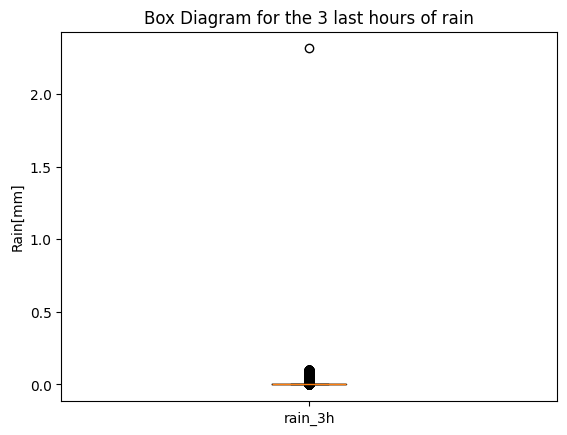

In [8]:
# Box plot
fig, ax = plt.subplots()
ax.boxplot(df['rain_3h'])
ax.set_xticklabels(['rain_3h'])
ax.set_ylabel('Rain[mm]')
ax.set_title('Box Diagram for the 3 last hours of rain')
plt.show()

We see that the values are clustered around 0, and therefore, they do not provide the sufficient information we want for our analysis. Hence, we will proceed to eliminate them. 

As for the 'temp_min' and 'temp_max' parameters, being values within a precise hour, variations with respect to the average temperature are insignificant. Through the correlation values, we see that their correlation is nearly 1, and therefore, we can afford not to use them for our subsequent analysis since the average temperature for the hour will be sufficient.

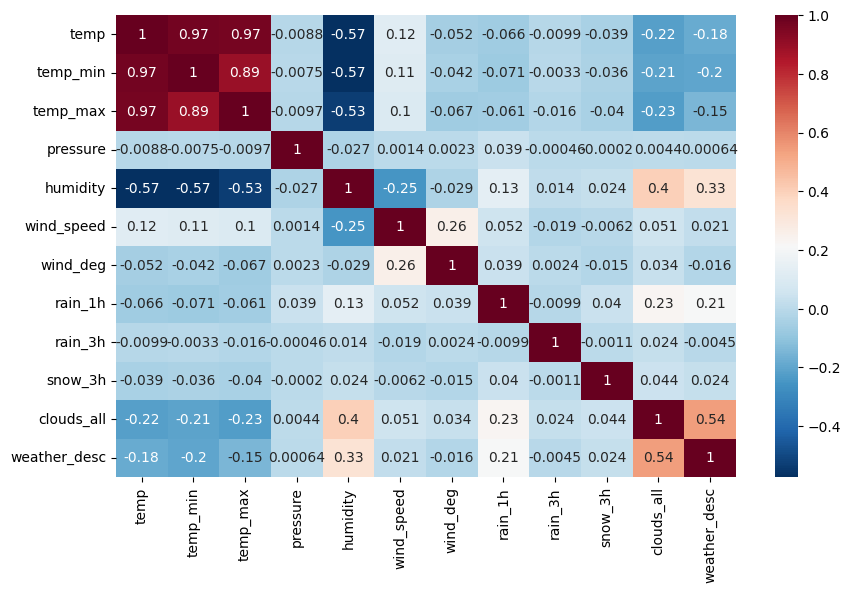

In [9]:
plt.figure(figsize=(10,6))
correlationID = df.drop('ID', axis = 1)
correlationID2 = correlationID.drop('hour', axis = 1)
correlationID3 = correlationID2.drop('day', axis = 1)
sns.heatmap(correlationID3.corr(),annot = True, cmap = 'RdBu_r')
plt.show()

In [10]:
df = df.drop('temp_min',axis=1)
df = df.drop('temp_max',axis=1)
df = df.drop('rain_3h',axis=1)
df

,ID,day,hour,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all,weather_desc
0,2015-01-Valencia,1,0,-2.5,1001,77,1,62,0.0,0.0,0,1
1,2015-01-Valencia,1,1,-2.5,1001,77,1,62,0.0,0.0,0,1
2,2015-01-Valencia,1,2,-3.3,1002,78,0,23,0.0,0.0,0,1
3,2015-01-Valencia,1,3,-3.3,1002,78,0,23,0.0,0.0,0,1
4,2015-01-Valencia,1,4,-3.3,1002,78,0,23,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-Seville,31,19,14.8,1028,54,3,30,0.0,0.0,0,1
178392,2018-12-Seville,31,20,12.8,1029,62,3,30,0.0,0.0,0,1
178393,2018-12-Seville,31,21,12.1,1028,58,4,50,0.0,0.0,0,1
178394,2018-12-Seville,31,22,11.1,1029,57,4,60,0.0,0.0,0,1


For our clustering process, we proceed to group the rows based on the new parameter 'ID', which includes the location, month, and year. This way, each group will calculate the mean (or median for 'weather_map_main'), providing us with the average values for each parameter for a city in a specific month of a particular year. This results in a more compact yet meaningful database for clustering analysis, revealing contrasts among the five major cities in Spain.

In [11]:
results = df.groupby('ID').agg({
    'temp': 'mean',
    'pressure': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',  
    'rain_1h': 'mean',   
    'snow_3h': 'mean',
    'clouds_all': 'mean',
    'weather_desc' : 'median' # Apply median to 'weather_desc'
}).reset_index()
results.to_csv('groupby.csv')
results

,ID,temp,pressure,humidity,wind_speed,rain_1h,snow_3h,clouds_all,weather_desc
0,2015-01- Barcelona,11.357258,1017.580645,63.391129,2.311828,0.086694,0.000000,20.833333,1.0
1,2015-01-Bilbao,5.115591,1023.333333,86.567204,1.641129,0.510081,0.097278,52.267473,2.0
2,2015-01-Madrid,2.062769,968.692204,75.811828,2.177419,0.033468,0.000000,22.033602,1.0
3,2015-01-Seville,8.447984,1031.845430,82.567204,2.982527,0.054032,0.000000,22.663978,1.0
4,2015-01-Valencia,8.780671,1016.240268,63.118121,4.723490,0.013691,0.000000,16.064430,1.0
...,...,...,...,...,...,...,...,...,...
235,2018-12- Barcelona,10.090763,1023.548862,75.070950,3.989290,0.004819,0.000000,13.040161,1.0
236,2018-12-Bilbao,8.797906,1025.061518,77.770942,2.018325,0.034162,0.000000,34.146597,2.0
237,2018-12-Madrid,6.417126,1026.426347,84.464671,1.449102,0.024790,0.000000,34.136527,2.0
238,2018-12-Seville,11.376333,1025.959688,79.091027,2.037711,0.017165,0.000000,10.590377,1.0


**K-Means method**

K-means is a clustering algorithm that searches for k centroids (k being the number of clusters) that are, at most, at a certain distance from every point inside the cluster. It is very sensitive to parameters of different dimension size and, because of that, we will normalize all the values.

In [12]:
# Normalization
kmeans_weather = results

kmeans_weather['temp'] = kmeans_weather['temp']/kmeans_weather['temp'].abs().max()
kmeans_weather['pressure'] = kmeans_weather['pressure']/kmeans_weather['pressure'].abs().max()
kmeans_weather['humidity'] = kmeans_weather['humidity']/kmeans_weather['humidity'].abs().max()
kmeans_weather['wind_speed'] = kmeans_weather['wind_speed']/kmeans_weather['wind_speed'].abs().max()
kmeans_weather['rain_1h'] = kmeans_weather['rain_1h']/kmeans_weather['rain_1h'].abs().max()
kmeans_weather['snow_3h'] = kmeans_weather['snow_3h']/kmeans_weather['snow_3h'].abs().max()
kmeans_weather['clouds_all'] = kmeans_weather['clouds_all']/kmeans_weather['clouds_all'].abs().max()

# We observe that for the 'weather_desc', we only have three values possibles 
# after normalization since we previously calculated the median, not the mean
kmeans_weather['weather_desc'] = kmeans_weather['weather_desc']/kmeans_weather['weather_desc'].abs().max()
kmeans_weather.to_csv('kmeans_weather.csv')
kmeans_weather


,ID,temp,pressure,humidity,wind_speed,rain_1h,snow_3h,clouds_all,weather_desc
0,2015-01- Barcelona,0.348079,0.067402,0.645690,0.390339,0.062016,0.000000,0.292324,0.333333
1,2015-01-Bilbao,0.156783,0.067783,0.881757,0.277095,0.364886,0.090755,0.733395,0.666667
2,2015-01-Madrid,0.063220,0.064164,0.772205,0.367645,0.023941,0.000000,0.309166,0.333333
3,2015-01-Seville,0.258915,0.068347,0.841013,0.503582,0.038652,0.000000,0.318011,0.333333
4,2015-01-Valencia,0.269111,0.067313,0.642909,0.797534,0.009794,0.000000,0.225409,0.333333
...,...,...,...,...,...,...,...,...,...
235,2018-12- Barcelona,0.309263,0.067797,0.764658,0.673569,0.003447,0.000000,0.182974,0.333333
236,2018-12-Bilbao,0.269640,0.067898,0.792160,0.340782,0.024438,0.000000,0.479130,0.666667
237,2018-12-Madrid,0.196673,0.067988,0.860341,0.244672,0.017734,0.000000,0.478989,0.666667
238,2018-12-Seville,0.348664,0.067957,0.805606,0.344056,0.012279,0.000000,0.148600,0.333333


The silhouette method is a technique for determining the optimal number of clusters (k) in k-means clustering. It measures how well each data point is clustered, and the optimal k corresponds to the point where the average silhouette width across clusters is maximized.

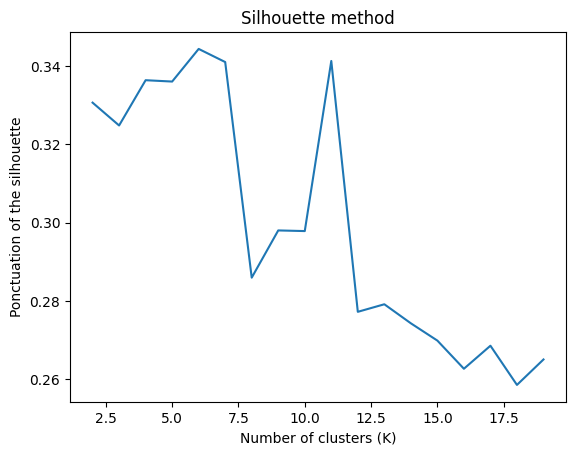

In [13]:
# Select only the numerical columns
numeric_cols = kmeans_weather.select_dtypes(include='number')

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=400, n_init=10, random_state=0)
    kmeans.fit(numeric_cols)
    silhouette_scores.append(silhouette_score(numeric_cols, kmeans.labels_))

# Plot the silhouette method
plt.plot(range(2, 20), silhouette_scores)
plt.title('Silhouette method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Ponctuation of the silhouette')
plt.show()

In [14]:
from sklearn import cluster
# Cluster to form 12 groups with similar parameters across cities and months.
# K-means just work on relevant features
data_cluster = results.drop('ID',axis=1) 
data_numeric = results.select_dtypes(include=['number'])

# Calculation of 6 clusters (K obtained in silhouette method)
k_means = cluster.KMeans(n_clusters=6, max_iter=20, random_state=1)
k_means.fit(data_numeric) # Ajusta el modelo K-means

labels = k_means.labels_ #Etiqueta
cluster_results = pd.DataFrame(labels, index=results.ID, columns=['N_ID'])
cluster_results.to_csv('cluster_results.csv')
cluster_results
#EXPLICAR DESPUES QUE CIUDADES Y MESES SE PARECEN

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,N_ID
ID,
2015-01- Barcelona,1
2015-01-Bilbao,2
2015-01-Madrid,1
2015-01-Seville,1
2015-01-Valencia,1
...,...
2018-12- Barcelona,1
2018-12-Bilbao,2
2018-12-Madrid,2


With the results, we can observe how the groups corresponding to a city in a specific month and year are clustered, allowing us to compare characteristics of the cities throughout the months between 2015 and 2018.

In [15]:
centroids = k_means.cluster_centers_
cent_norm = pd.DataFrame(centroids,columns=data_cluster.columns)
cent_norm

,temp,pressure,humidity,wind_speed,rain_1h,snow_3h,clouds_all,weather_desc
0,0.680493,0.067313,0.706369,0.410691,0.065029,2.602085e-18,0.322948,0.666667
1,0.377441,0.067453,0.720104,0.424911,0.031988,2.722126e-05,0.245487,0.333333
2,0.392068,0.067431,0.818731,0.330458,0.080009,2.708004e-03,0.596123,0.695906
3,0.760035,0.067192,0.503425,0.403928,0.018302,4.336809e-18,0.128428,0.333333
4,0.147540,0.067511,0.921073,0.310050,0.521503,1.000000e+00,1.000000,1.000000
5,0.369424,0.088798,0.710215,0.551895,0.064100,1.743460e-04,0.408300,0.666667


**DBSCAN method**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points based on their density within the dataset, identifying core samples, and isolating outliers or noise points. It does not require specifying the number of clusters in advance.

In [16]:
# Get just a 2D dataFrame to enable visualization
# We choose 'rain_1h' and 'clouds_all' in order tod see the relation between the clouds and the quantity of rain in 1 hour
rain_clouds = results.drop(['ID','temp','pressure','humidity','wind_speed','snow_3h','weather_desc'],axis=1)
rain_clouds

,rain_1h,clouds_all
0,0.062016,0.292324
1,0.364886,0.733395
2,0.023941,0.309166
3,0.038652,0.318011
4,0.009794,0.225409
...,...,...
235,0.003447,0.182974
236,0.024438,0.479130
237,0.017734,0.478989
238,0.012279,0.148600


<Axes: xlabel='rain_1h', ylabel='clouds_all'>

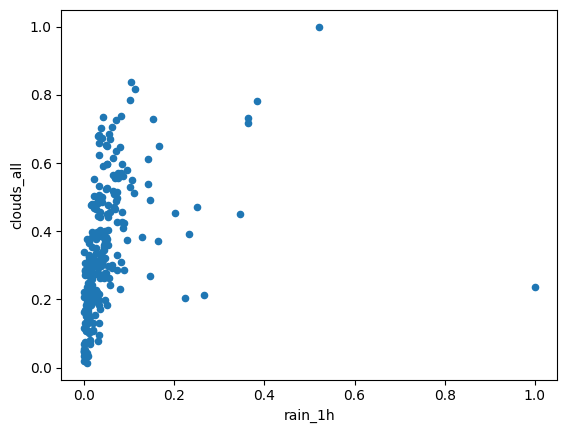

In [17]:
rain_clouds.plot.scatter(x='rain_1h',y='clouds_all')

**Comparison of the two methods**

In this section we will compare, visually, the performance of two clustering techniques.

Average distance among the 5 nearest neighbors: 0.023270148260750963


<Axes: xlabel='rain_1h', ylabel='clouds_all'>

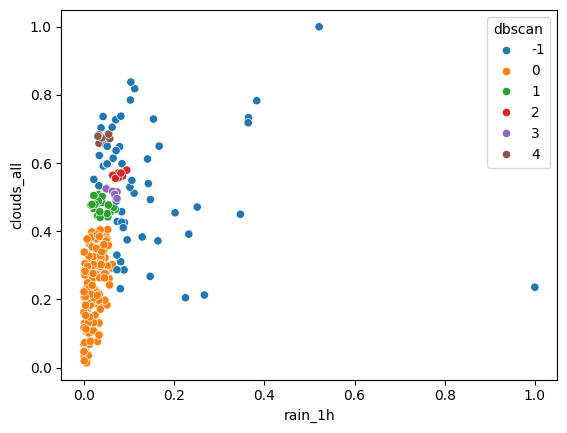

In [18]:
k = 5 # Number of nearest neighbors to consider.
nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(rain_clouds)
distances, _ = nbrs.kneighbors(rain_clouds)
# Calculate the average distance among the k nearest neighbors.
avg_distances = np.mean(distances[:, 1:]) # Excluding the first neighbor, which is the point itself.
print("Average distance among the", k, "nearest neighbors:", avg_distances)

db = DBSCAN(eps=avg_distances, min_samples=7).fit(rain_clouds)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
rain_clouds['dbscan'] = db.labels_
sns.scatterplot(data=rain_clouds, x='rain_1h', y='clouds_all', hue='dbscan', palette='tab10')

While there is no guarantee that all points that DBSCAN labels as -1 (which is the code assigned to points that are considered outliers or noise) are actually outliers, it is likely that many of them are. DBSCAN assigns code -1 to points that do not meet the minimum density requirements (minimum number of points within a specific radius).

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='rain_1h', ylabel='clouds_all'>

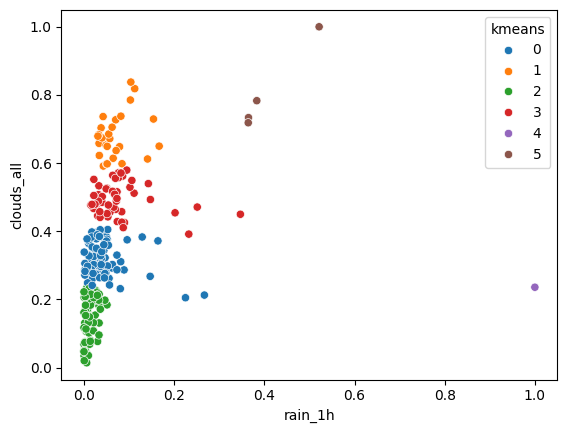

In [19]:
# Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=6)  
rain_clouds['kmeans'] = kmeans.fit_predict(rain_clouds[['rain_1h', 'clouds_all']])
sns.scatterplot(data=rain_clouds, x='rain_1h', y='clouds_all', hue='kmeans', palette='tab10')

In our case, we have observed that the K-Means method seems more suitable, as the formed clusters appear more appropriate than those obtained using DBSCAN. This has caused some confusion for us since we understood that DBSCAN performs better in cases where clusters have arbitrary shapes, are not necessarily spherical, or when the density of clusters is variable, even in the presence of noise or outliers in the data. In our case, these conditions apply, and that's why we were surprised by the result.